# Module 1, Notebook 4, Outline:

## Discuss Materialist vs. Data Scientist  
## Feature Selection & Reduction
- Objectives, Methods, and Considerations
- Different feature reduction methods
- Trade-off between complexity and interpretability 
## Encoding Chemical Structures  
## Minibatch processing.  
## Continue work on module exercises.  


# Materialist vs. Data Scientist - Let's Talk About Terminology

## "Collect some data" vs. "Perform an experiment"

### Materialist: 
- **"Perform an experiment"**: Go into the lab and conduct a synthesis or characterization, collecting relevant data in the process.  
- **"Design an experiment"**: Systematic selection of process inputs to understand chemistry/physics or variable relationships.  
- **"Collect some data"**: Conduct lab work to generate data through synthesis or characterization.  

### Data Scientist: 
- **"Perform an experiment"**: Conduct a computational study to examine factors influencing the model.  
- **"Design an experiment"**: Select specific inputs for a computational model.  
- **"Perform a design"**: Choose process inputs for the model.  
- **"Collect some data"**: Download data from a repository or acquire it from a collaborator.  

---

## Feature Selection and Reduction

### Objectives:  
The selection of features depends on our AI utilization goals.  
- **Feature selection**: Helps understand *why* specific variables are important.  
- **Feature reduction**: Reduces dimensionality but sacrifices explainability.  

---

## Feature Selection vs. Feature Reduction  

### Feature Selection:  
- Focuses on identifying the most relevant features.  
- Crucial for costly experiments (e.g., extracting bone marrow in medicine).  
- **Mathematical insight**: Closer to the right features → better problem-solving.  

### Feature Reduction:  
- Applicable when all data is available.  
- Techniques include: PCA, LDA, FLDA, t-SNE (nonlinear), UMAP (nonlinear).  
- Reduces dimensionality to make the problem easier and faster to solve.  

---

## Dimensionality Techniques

1. **Human-selected features**.  
2. **Human-selected features transformed via PCA for dimensionality reduction**.  
3. **Nonlinear projection of dataset into t-SNE, UMAP, or Autoencoder**.  

### Key Questions:
1. Which method gave the best result?  
2. Which method is the most explainable?  

---

### Summary:
- **Feature selection**: Harder but improves explainability.  
- **Feature reduction**: Faster but reduces explainability.


# Feature Selection and Reduction Methods

Feature selection improves model performance by reducing overfitting, improving interpretability, and decreasing computation time. Here are common methods for feature selection:

### 1. **Filter Methods**
- **Correlation-Based Selection**: Selects features with high correlation to the target and low correlation with each other.
- **Variance Threshold**: Removes features with low variance (unimportant features).
- **Chi-Square Test**: Evaluates dependence between categorical features and the target variable.

### 2. **Wrapper Methods**
- **Recursive Feature Elimination (RFE)**: Recursively removes least important features and trains models on the remaining ones.
- **Stepwise Feature Selection**: Sequentially adds or removes features based on model performance (e.g., forward or backward selection).

### 3. **Embedded Methods**
- **Lasso Regression (L1 Regularization)**: Automatically selects important features by shrinking less important feature coefficients to zero.
- **Tree-Based Feature Importance**: Uses tree-based models (e.g., Random Forest) to rank and select features based on their importance.

### 4. **Dimensionality Reduction Methods**
- **Principal Component Analysis (PCA)**: Transforms features into a reduced set of uncorrelated principal components that retain most variance.
- **Linear Discriminant Analysis (LDA)**: Reduces dimensionality while preserving class separability for classification tasks.

### Summary:
- **Filter Methods**: Quick and efficient for large datasets.
- **Wrapper Methods**: Thorough but computationally expensive.
- **Embedded Methods**: Efficient and integrated into model training.
- **Dimensionality Reduction**: Transforms feature space, ideal for reducing multicollinearity.

# Load data from previous notebook

In [15]:
import pickle
import pandas as pd

path = './'+'CompoundDataFuncsFingerprints.parquet'

df=pd.read_parquet(path)
df=df.dropna().reset_index(drop=True)

# Feature Identification

## Pearson Correlation Matrix

In [17]:
df.keys()

Index(['CAS', 'MW', 'BP', 'SMILES', 'mol3D', 'Allenic', 'Vinylic', 'Arene',
       'Alcohol', 'Ether', 'Amine', 'Imine', 'Nitrile', 'Thiol', 'Sulfide',
       'Disulfide', 'Aldehyde', 'Ketone', 'CarboxylAcid', 'Ester', 'Thioester',
       'Amide', 'AcidChloride', 'Anhydride', 'Errors', 'CripA', 'CripB',
       'PartialCharge', 'Fingerprint'],
      dtype='object')

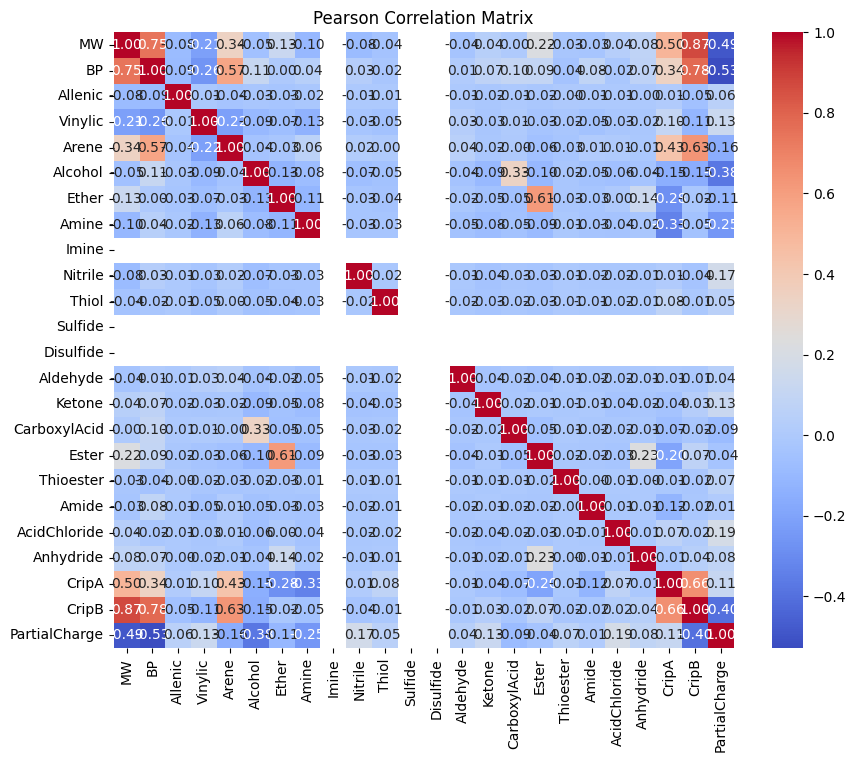

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the columns you want to exclude from the correlation analysis
columns_to_drop = ['CAS','SMILES', 'mol3D', 'Fingerprint', 'Errors']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned = df_cleaned.dropna()

# Compute the Pearson correlation matrix
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

## Find 10 Most Correlated Features

In [9]:
import pandas as pd

# Drop columns that are not needed for feature selection
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors']
df_cleaned = df.drop(columns=columns_to_drop)

# Drop rows with NaN values
df_cleaned = df_cleaned.dropna()

# Extract the target variable 'BP'
y = df_cleaned['BP']
X = df_cleaned.drop(columns=['BP'])

# Calculate the correlation of each feature with the target 'BP'
correlation_matrix = X.corrwith(y).abs()

# Specify the number of top features to select (e.g., top 10)
n_top_features = 10

# Select the top N most correlated features
top_n_features = correlation_matrix.nlargest(n_top_features).index

# Filter the original DataFrame to include only the selected features
df_filtered = df_cleaned[top_n_features]

# Print the selected features
print(f"Top {n_top_features} most correlated features with BP:")
print(top_n_features)

# Optional: Handle multicollinearity (drop features that are highly correlated with each other)
# Calculate the correlation matrix for the selected features
feature_corr_matrix = df_filtered.corr().abs()

# Set a threshold for multicollinearity (e.g., 0.6 for moderately correlated features)
multicollinearity_threshold = 0.8

# Remove one of each pair of highly correlated features
to_drop = set()
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i):
        if feature_corr_matrix.iloc[i, j] > multicollinearity_threshold:
            to_drop.add(feature_corr_matrix.columns[i])

# Drop the highly correlated features
df_filtered = df_filtered.drop(columns=to_drop)

# Print final features after handling multicollinearity
print(f"\nFeatures after handling multicollinearity:")
print(df_filtered.columns)


Top 10 most correlated features with BP:
Index(['CripB', 'MW', 'Arene', 'PartialCharge', 'CripA', 'Vinylic', 'Alcohol',
       'CarboxylAcid', 'Ester', 'Allenic'],
      dtype='object')

Features after handling multicollinearity:
Index(['CripB', 'Arene', 'PartialCharge', 'CripA', 'Vinylic', 'Alcohol',
       'CarboxylAcid', 'Ester', 'Allenic'],
      dtype='object')


C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## Find 10 Features with Highest Variance

In [10]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Drop columns that are not needed for feature selection
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']  # Also drop the target variable 'BP'
df_cleaned = df.drop(columns=columns_to_drop)

# Drop rows with NaN values
df_cleaned = df_cleaned.dropna()

# Extract the target variable 'BP'
y = df['BP'].dropna()

# Calculate variance for each feature
variances = df_cleaned.var()

# Specify the number of top features to select (e.g., top 10)
n_top_features = 10

# Select the top N features with the highest variance
top_n_features = variances.nlargest(n_top_features).index

# Print the selected features
print(f"Top {n_top_features} features with highest variance:")
print(top_n_features)

# df_filtered is the DataFrame with selected features

Top 10 features with highest variance:
Index(['MW', 'CripB', 'CripA', 'Arene', 'Ether', 'Vinylic', 'Alcohol', 'Ester',
       'Amine', 'Ketone'],
      dtype='object')


## Select columns with targeted features

In [11]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##############################################
# Prepare data using specified columns as features
##############################################

# Feature sets
feature_set_1 = ['CripB', 'PartialCharge', 'Vinylic', 'Alcohol', 'CarboxylAcid', 'Ester', 'Allenic', 'Amide']
feature_set_2 = ['MW','CripB', 'CripA', 'Arene', 'Ether', 'Vinylic', 'Alcohol', 'Ester', 'Amine', 'Ketone', 'PartialCharge']

# Combine both feature sets into a unique list of features
selected_features = list(set(feature_set_1 + feature_set_2))

# Extract features and target from dataframe
#X = np.array(df[selected_features].tolist(), dtype=np.float32)
X = df[selected_features].values.astype(np.float32)  # Convert to float32 for PyTorch compatibility
y = df['BP'].values  # Target values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Flatten after scaling
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Flatten after scaling

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

## Check for NaN Values and Drop

In [12]:
print(df[selected_features].isna().sum())  # Check for NaN values in features
print(df['BP'].isna().sum())               # Check for NaN values in the target

# If using numpy arrays directly:
print(np.isnan(X).sum(), np.isinf(X).sum())  # Check for NaNs or infs in features
print(np.isnan(y).sum(), np.isinf(y).sum())  # Check for NaNs or infs in target

Alcohol          0
Allenic          0
PartialCharge    1
CripA            0
MW               0
Amide            0
Ester            0
CarboxylAcid     0
Amine            0
Ether            0
CripB            0
Vinylic          0
Ketone           0
Arene            0
dtype: int64
0
1 0
0 0


In [13]:
df = df.dropna(subset=selected_features + ['BP'])

# NN with top 20 Human-selected descriptors - 32|16 Hidden Layers

Epoch [100/10000], Loss: 903.1683, Val Loss: 924.2506, LR: 0.000100
Epoch [200/10000], Loss: 661.1777, Val Loss: 686.3628, LR: 0.000055
Epoch [300/10000], Loss: 580.3511, Val Loss: 609.3697, LR: 0.000100
Epoch [400/10000], Loss: 349.2793, Val Loss: 384.3490, LR: 0.000087
Epoch [500/10000], Loss: 271.4840, Val Loss: 308.6079, LR: 0.000055
Epoch [600/10000], Loss: 254.2368, Val Loss: 291.8772, LR: 0.000023
Epoch [700/10000], Loss: 249.7996, Val Loss: 287.6581, LR: 0.000100
Epoch [800/10000], Loss: 232.2293, Val Loss: 271.6558, LR: 0.000097
Epoch [900/10000], Loss: 223.4344, Val Loss: 264.4058, LR: 0.000087
Epoch [1000/10000], Loss: 217.5681, Val Loss: 259.7173, LR: 0.000072
Epoch [1100/10000], Loss: 213.5942, Val Loss: 256.4941, LR: 0.000055
Epoch [1200/10000], Loss: 210.9418, Val Loss: 254.2717, LR: 0.000038
Epoch [1300/10000], Loss: 209.2322, Val Loss: 252.7943, LR: 0.000023
Epoch [1400/10000], Loss: 208.2434, Val Loss: 251.9019, LR: 0.000013
Epoch [1500/10000], Loss: 207.6238, Val Los

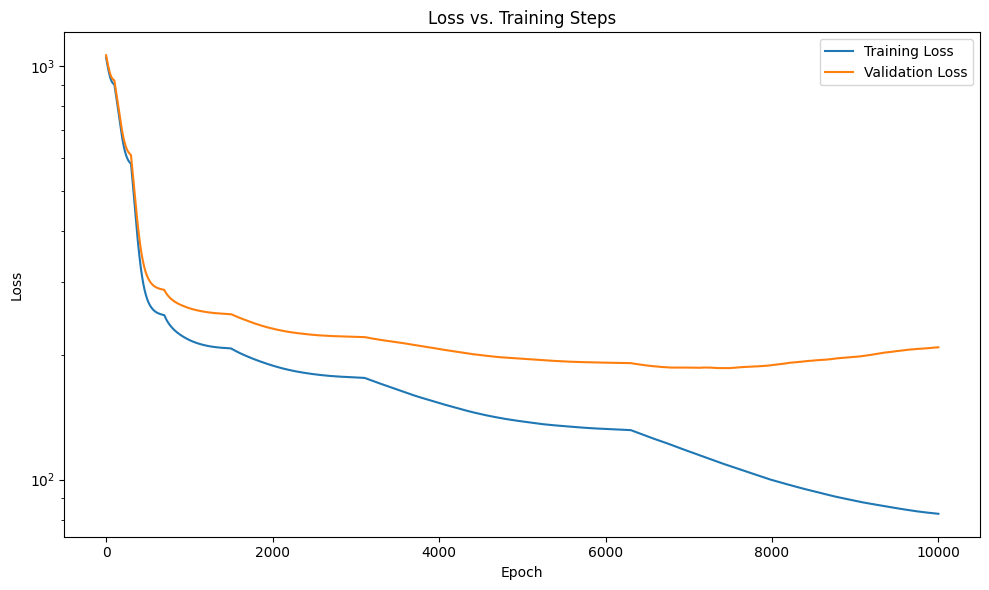

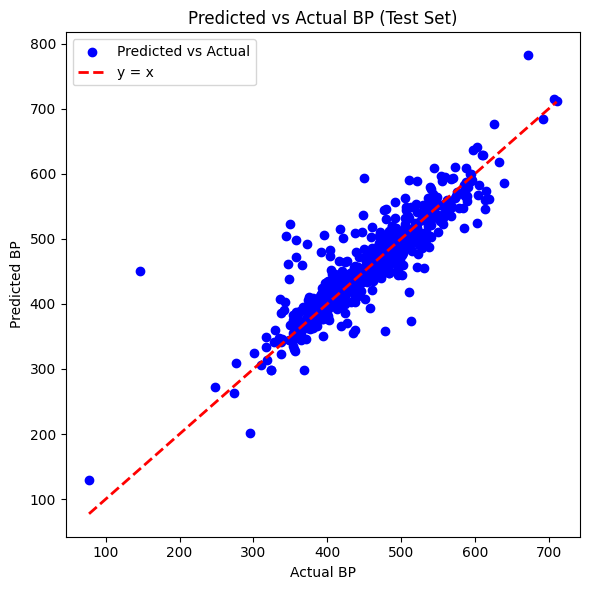

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data using specified columns as features
##############################################

# Feature sets
feature_set_1 = ['CripB', 'PartialCharge', 'Vinylic', 'Alcohol', 'CarboxylAcid', 'Ester', 'Allenic', 'Amide']
feature_set_2 = ['MW', 'CripB', 'CripA', 'Arene', 'Ether', 'Vinylic', 'Alcohol', 'Ester', 'Amine', 'Ketone', 'PartialCharge']

# Combine both feature sets into a unique list of features
selected_features = list(set(feature_set_1 + feature_set_2))

# Extract features and target from dataframe
#X = np.array(df[selected_features].tolist(), dtype=np.float32)
X = df[selected_features].values.astype(np.float32)  # Convert to float32 for PyTorch compatibility
y = df['BP'].values  # Target values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Flatten after scaling
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Flatten after scaling

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.0001  # Track this as a hyperparameter
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
# Log initial hyperparameters
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 5000')

##############################################
# training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate (for example, for the first parameter group)
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard without saving to a file
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# PCA of Descriptors and Functional Groups - 15 Components

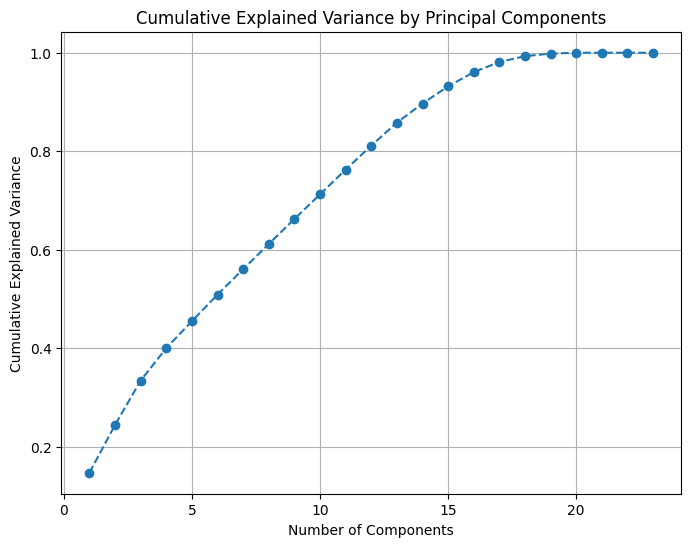

Number of components explaining 90.0% of the variance: 15


In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop non-numeric columns you want to exclude from the PCA analysis
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop)

# Remove rows with NaN values
df_cleaned = df_cleaned.dropna()

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Fit PCA
pca = PCA()
pca.fit(df_scaled)

# Plot cumulative explained variance to choose the number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Select the number of components that explain 90% of the variance (example)
explained_variance_threshold = 0.90
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= explained_variance_threshold) + 1

print(f'Number of components explaining {explained_variance_threshold*100}% of the variance: {n_components}')

# Transform the data using the selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# df_pca is now the new dataset with selected principal components as features

In [16]:
df_cleaned.keys()

Index(['MW', 'Allenic', 'Vinylic', 'Arene', 'Alcohol', 'Ether', 'Amine',
       'Imine', 'Nitrile', 'Thiol', 'Sulfide', 'Disulfide', 'Aldehyde',
       'Ketone', 'CarboxylAcid', 'Ester', 'Thioester', 'Amide', 'AcidChloride',
       'Anhydride', 'CripA', 'CripB', 'PartialCharge'],
      dtype='object')

Epoch [100/10000], Loss: 882.1592, Val Loss: 910.2327, LR: 0.000100
Epoch [200/10000], Loss: 662.4845, Val Loss: 694.7269, LR: 0.000055
Epoch [300/10000], Loss: 582.8558, Val Loss: 618.0494, LR: 0.000100
Epoch [400/10000], Loss: 350.1839, Val Loss: 383.8666, LR: 0.000087
Epoch [500/10000], Loss: 261.1851, Val Loss: 294.2642, LR: 0.000055
Epoch [600/10000], Loss: 240.1103, Val Loss: 273.5344, LR: 0.000023
Epoch [700/10000], Loss: 235.3200, Val Loss: 268.9719, LR: 0.000100
Epoch [800/10000], Loss: 220.3690, Val Loss: 255.8382, LR: 0.000097
Epoch [900/10000], Loss: 214.2747, Val Loss: 250.9961, LR: 0.000087
Epoch [1000/10000], Loss: 210.3040, Val Loss: 248.0069, LR: 0.000072
Epoch [1100/10000], Loss: 207.6189, Val Loss: 246.0914, LR: 0.000055
Epoch [1200/10000], Loss: 205.7748, Val Loss: 244.7476, LR: 0.000038
Epoch [1300/10000], Loss: 204.6344, Val Loss: 243.9789, LR: 0.000023
Epoch [1400/10000], Loss: 203.9612, Val Loss: 243.5352, LR: 0.000013
Epoch [1500/10000], Loss: 203.5353, Val Los

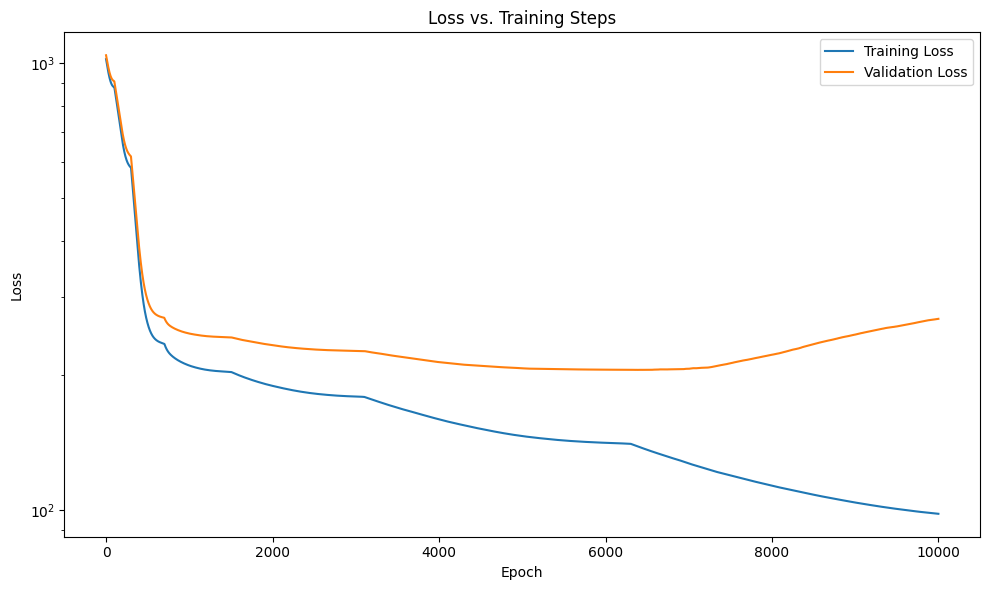

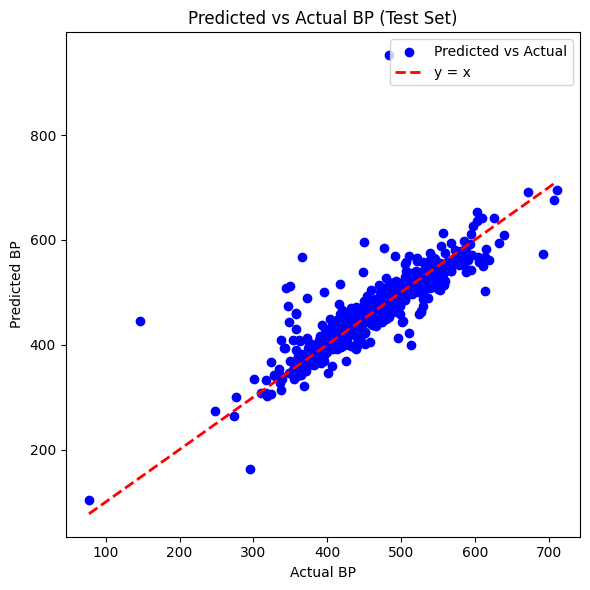

In [17]:
# pip install torch torchvision tensorboard
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Apply PCA to reduce features to 15 components
##############################################

# Drop non-numeric columns and select features for PCA
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors','BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Fit PCA and reduce the data to 15 components
pca = PCA(n_components=15)
X_pca = pca.fit_transform(df_scaled)

# Target values
y = df['BP'].values  # Assuming 'BP' is in df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.0001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 5000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


In [18]:
[list(df.keys())[1]]

['MW']

In [19]:
list(df.keys())[5:-5]

['Allenic',
 'Vinylic',
 'Arene',
 'Alcohol',
 'Ether',
 'Amine',
 'Imine',
 'Nitrile',
 'Thiol',
 'Sulfide',
 'Disulfide',
 'Aldehyde',
 'Ketone',
 'CarboxylAcid',
 'Ester',
 'Thioester',
 'Amide',
 'AcidChloride',
 'Anhydride']

In [20]:
list(df.keys())[-4:-1]

['CripA', 'CripB', 'PartialCharge']

In [21]:
list(df.keys())[-1:]

['Fingerprint']

# PCA of Combined Features (Chemical Fingerprint and Descriptors) - 502 Components, 64|32 Neuron Hidden Layers

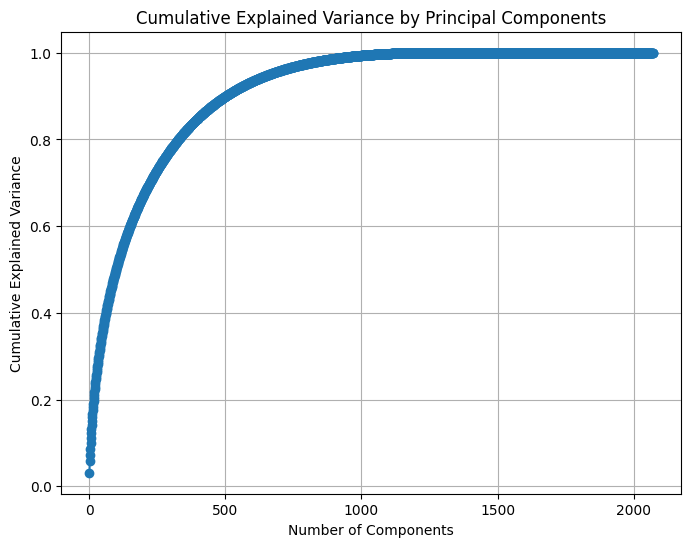

Number of components explaining 90.0% of the variance: 502


In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Drop non-numeric columns you want to exclude from the PCA analysis
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop)

# Remove rows with NaN values
df_cleaned = df_cleaned.dropna()

# Extract fingerprint information
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)

# Combine the cleaned features and fingerprint information
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for PCA)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Fit PCA
pca = PCA()
pca.fit(combined_scaled)

# Plot cumulative explained variance to choose the number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Select the number of components that explain 90% of the variance (example)
explained_variance_threshold = 0.90
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= explained_variance_threshold) + 1

print(f'Number of components explaining {explained_variance_threshold*100}% of the variance: {n_components}')

# Transform the data using the selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(combined_scaled)

# df_pca is now the new dataset with selected principal components as features

Epoch [100/10000], Loss: 986.2013, Val Loss: 1023.0817, LR: 0.000001
Epoch [200/10000], Loss: 970.5632, Val Loss: 1013.4843, LR: 0.000006
Epoch [300/10000], Loss: 922.9957, Val Loss: 983.3882, LR: 0.000001
Epoch [400/10000], Loss: 914.4027, Val Loss: 978.2052, LR: 0.000002
Epoch [500/10000], Loss: 893.0996, Val Loss: 964.1929, LR: 0.000006
Epoch [600/10000], Loss: 852.3554, Val Loss: 936.4894, LR: 0.000009
Epoch [700/10000], Loss: 795.4280, Val Loss: 896.7410, LR: 0.000001
Epoch [800/10000], Loss: 788.1514, Val Loss: 891.9656, LR: 0.000001
Epoch [900/10000], Loss: 777.6685, Val Loss: 884.4766, LR: 0.000002
Epoch [1000/10000], Loss: 760.0172, Val Loss: 871.9280, LR: 0.000004
Epoch [1100/10000], Loss: 732.6334, Val Loss: 852.4816, LR: 0.000006
Epoch [1200/10000], Loss: 694.0543, Val Loss: 824.9847, LR: 0.000007
Epoch [1300/10000], Loss: 644.5339, Val Loss: 789.1817, LR: 0.000009
Epoch [1400/10000], Loss: 585.2094, Val Loss: 745.0963, LR: 0.000010
Epoch [1500/10000], Loss: 520.5343, Val L

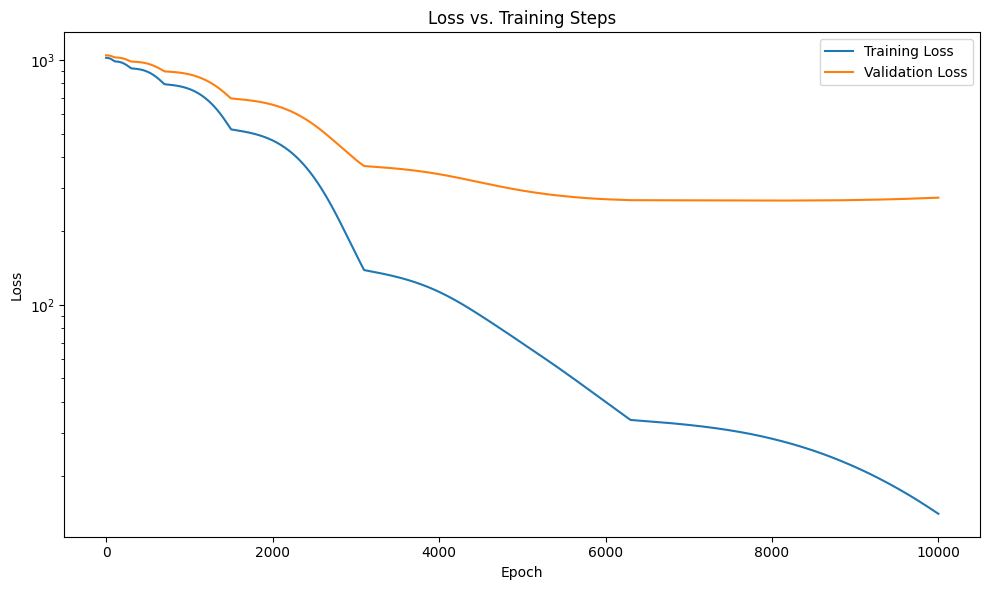

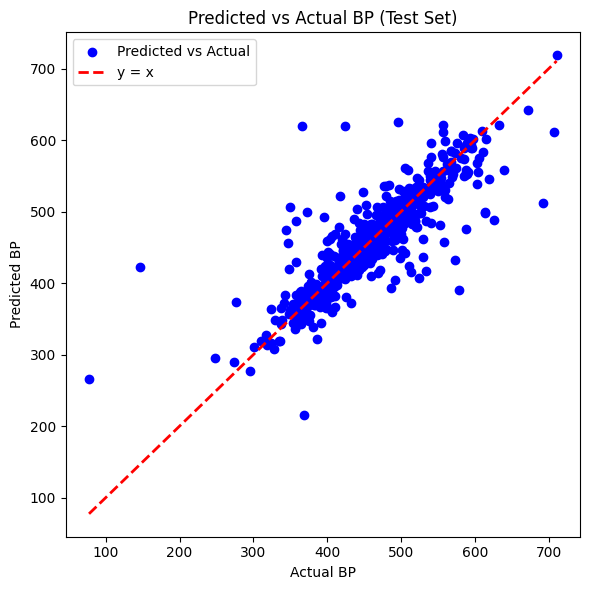

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data for PCA
##############################################

# Drop non-numeric columns and select features for PCA
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for PCA)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Fit PCA and reduce the data to 15 components
pca = PCA(n_components=502)
X_pca = pca.fit_transform(combined_scaled)

# Target values
y = df['BP'].values  # Assuming 'BP' is available in df

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.000001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# PCA of Combined Features (Chemical Fingerprint and Descriptors) - 502 Components, 64|32|16|32 Neuron Hidden Layers

Epoch [100/10000], Loss: 1009.4366, Val Loss: 1044.0995, LR: 0.000001
Epoch [200/10000], Loss: 1005.9474, Val Loss: 1041.4104, LR: 0.000006
Epoch [300/10000], Loss: 994.5899, Val Loss: 1032.2772, LR: 0.000001
Epoch [400/10000], Loss: 992.4217, Val Loss: 1030.6122, LR: 0.000002
Epoch [500/10000], Loss: 987.0159, Val Loss: 1026.1372, LR: 0.000006
Epoch [600/10000], Loss: 975.5521, Val Loss: 1016.6409, LR: 0.000009
Epoch [700/10000], Loss: 956.6533, Val Loss: 1000.8821, LR: 0.000001
Epoch [800/10000], Loss: 954.0425, Val Loss: 998.8677, LR: 0.000001
Epoch [900/10000], Loss: 950.3264, Val Loss: 995.7664, LR: 0.000002
Epoch [1000/10000], Loss: 943.9072, Val Loss: 990.4800, LR: 0.000004
Epoch [1100/10000], Loss: 933.4785, Val Loss: 981.9445, LR: 0.000006
Epoch [1200/10000], Loss: 917.5093, Val Loss: 968.8652, LR: 0.000007
Epoch [1300/10000], Loss: 893.8425, Val Loss: 949.8738, LR: 0.000009
Epoch [1400/10000], Loss: 860.5425, Val Loss: 923.4852, LR: 0.000010
Epoch [1500/10000], Loss: 818.0291

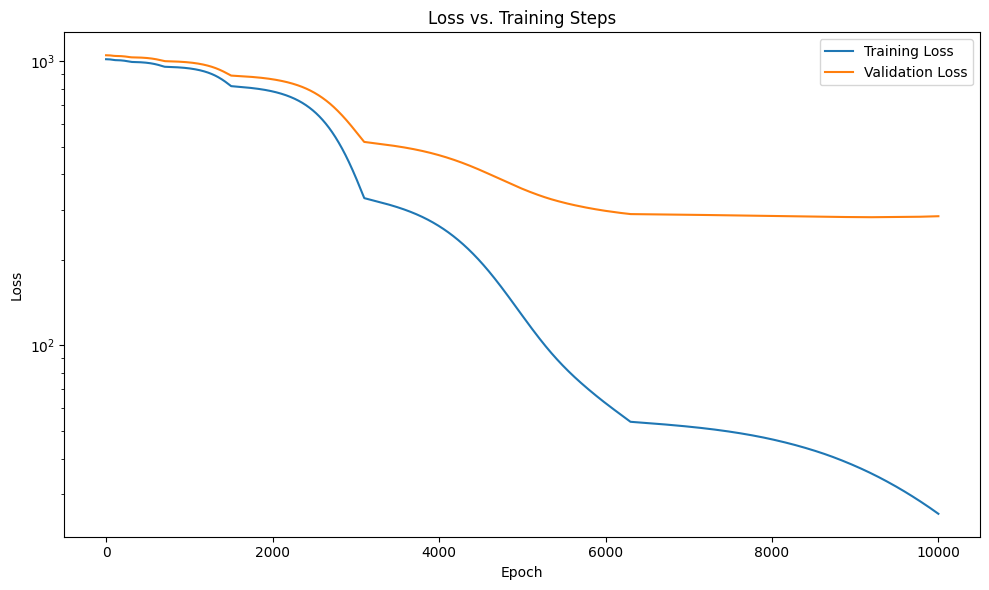

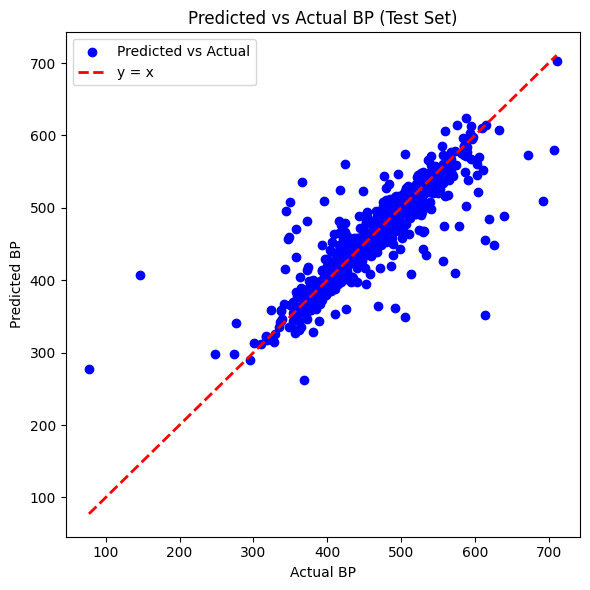

In [24]:
#Because we increased the number of PCA components, let's see how a deeper neural net impacts the outcome

# pip install torch torchvision tensorboard
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data for PCA
##############################################

# Drop non-numeric columns and select features for PCA
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for PCA)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Fit PCA and reduce the data to 15 components
pca = PCA(n_components=502)
X_pca = pca.fit_transform(combined_scaled)

# Target values
y = df['BP'].values  # Assuming 'BP' is available in df

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.000001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


In [25]:
### NOTE: With 500 features, and ~3000 data points, we have samples/feature of ~6

In [26]:
import pickle
import pandas as pd

path = './'+'CompoundDataFuncsFingerprints.parquet'

df=pd.read_parquet(path)
df=df.dropna().reset_index(drop=True)

# t-SNE of Combined - 3 Dimensions - 64|32|16|32 Neuron Hidden Layers

Epoch [100/10000], Loss: 1130.9287, Val Loss: 1202.3091, LR: 0.000010
Epoch [200/10000], Loss: 1062.1813, Val Loss: 1135.1876, LR: 0.000010
Epoch [300/10000], Loss: 1004.9225, Val Loss: 1078.5742, LR: 0.000010
Epoch [400/10000], Loss: 957.0088, Val Loss: 1031.5897, LR: 0.000010
Epoch [500/10000], Loss: 915.8140, Val Loss: 991.8256, LR: 0.000010
Epoch [600/10000], Loss: 879.1922, Val Loss: 956.3839, LR: 0.000010
Epoch [700/10000], Loss: 846.7859, Val Loss: 924.3265, LR: 0.000010
Epoch [800/10000], Loss: 819.4055, Val Loss: 896.7283, LR: 0.000010
Epoch [900/10000], Loss: 796.3591, Val Loss: 873.3374, LR: 0.000010
Epoch [1000/10000], Loss: 776.7095, Val Loss: 853.1170, LR: 0.000010
Epoch [1100/10000], Loss: 759.5052, Val Loss: 835.3734, LR: 0.000010
Epoch [1200/10000], Loss: 744.6276, Val Loss: 820.4826, LR: 0.000010
Epoch [1300/10000], Loss: 731.3517, Val Loss: 807.3207, LR: 0.000010
Epoch [1400/10000], Loss: 718.7050, Val Loss: 795.5919, LR: 0.000010
Epoch [1500/10000], Loss: 706.9697, 

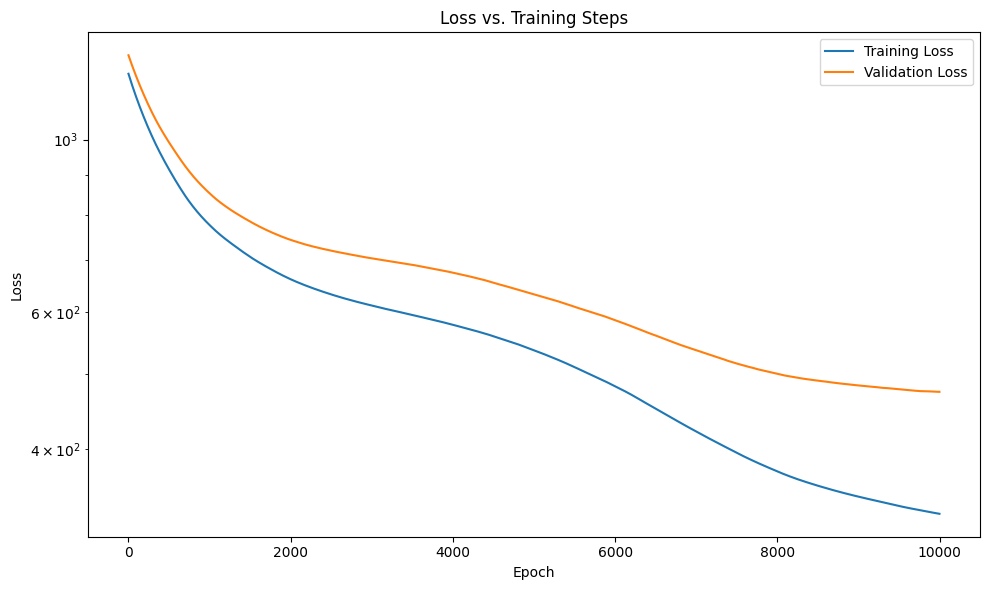

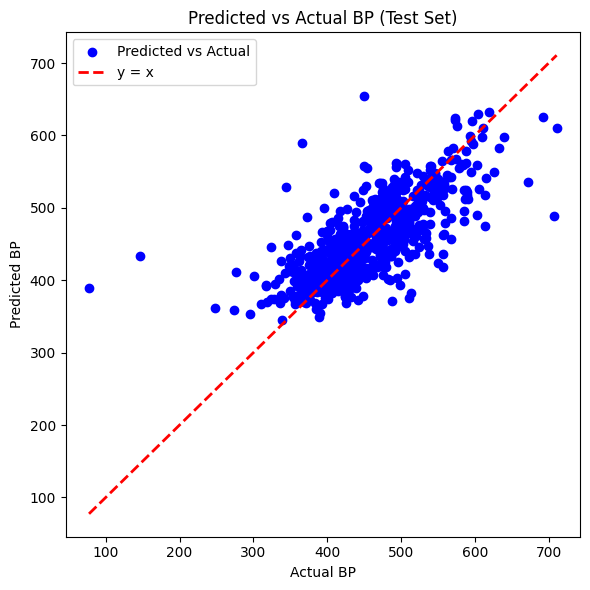

In [27]:
# pip install torch torchvision tensorboard
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data for t-SNE
##############################################

# Drop non-numeric columns and select features for t-SNE
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Apply t-SNE to reduce the data to 502 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(combined_scaled)

# Target values
y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# t-SNE of Combined - 3 Dimensions - 64|32 Neuron Hidden Layers

Epoch [100/10000], Loss: 3630.5181, Val Loss: 3973.4143, LR: 0.000010
Epoch [200/10000], Loss: 2850.4309, Val Loss: 3131.7810, LR: 0.000010
Epoch [300/10000], Loss: 2285.9785, Val Loss: 2517.3308, LR: 0.000010
Epoch [400/10000], Loss: 1876.6292, Val Loss: 2069.3696, LR: 0.000010
Epoch [500/10000], Loss: 1585.2014, Val Loss: 1747.4335, LR: 0.000010
Epoch [600/10000], Loss: 1378.1876, Val Loss: 1519.3035, LR: 0.000010
Epoch [700/10000], Loss: 1230.8473, Val Loss: 1357.9512, LR: 0.000010
Epoch [800/10000], Loss: 1123.8348, Val Loss: 1241.3995, LR: 0.000010
Epoch [900/10000], Loss: 1044.2990, Val Loss: 1155.5214, LR: 0.000010
Epoch [1000/10000], Loss: 982.7233, Val Loss: 1089.8112, LR: 0.000010
Epoch [1100/10000], Loss: 933.2004, Val Loss: 1037.8368, LR: 0.000010
Epoch [1200/10000], Loss: 893.0559, Val Loss: 995.7230, LR: 0.000010
Epoch [1300/10000], Loss: 860.1083, Val Loss: 961.7260, LR: 0.000010
Epoch [1400/10000], Loss: 832.6907, Val Loss: 933.7513, LR: 0.000010
Epoch [1500/10000], Los

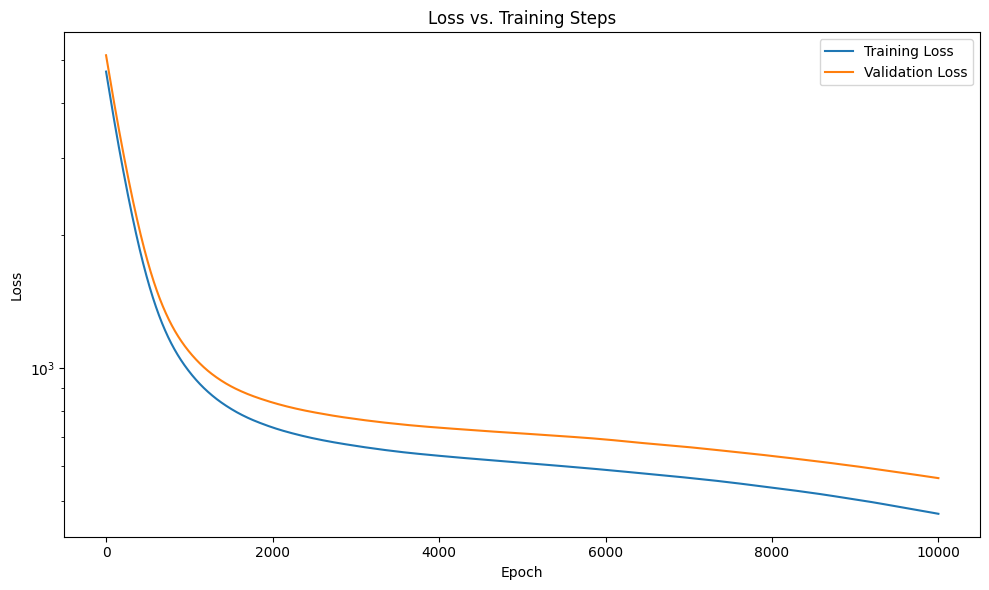

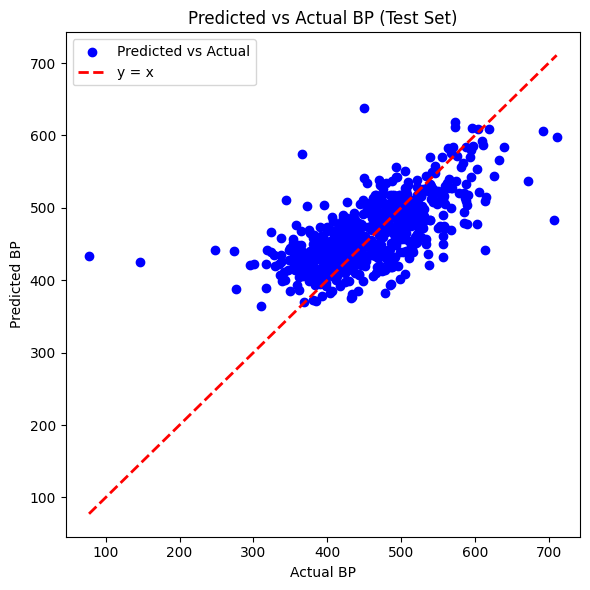

In [28]:
# pip install torch torchvision tensorboard
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data for t-SNE
##############################################

# Drop non-numeric columns and select features for t-SNE
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Apply t-SNE to reduce the data to 502 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(combined_scaled)

# Target values
y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# UMAP of Combined - 10 Components - 64|32|16|32 Neuron Hidden Layers

In [ ]:
pip install numpy==2.0

C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Epoch [100/10000], Loss: 994.7108, Val Loss: 1028.9620, LR: 0.000010
Epoch [200/10000], Loss: 983.7807, Val Loss: 1018.1501, LR: 0.000010
Epoch [300/10000], Loss: 973.6780, Val Loss: 1007.9049, LR: 0.000010
Epoch [400/10000], Loss: 964.1450, Val Loss: 998.4464, LR: 0.000010
Epoch [500/10000], Loss: 954.4411, Val Loss: 988.9257, LR: 0.000010
Epoch [600/10000], Loss: 941.8217, Val Loss: 976.1767, LR: 0.000010
Epoch [700/10000], Loss: 929.5885, Val Loss: 964.4716, LR: 0.000010
Epoch [800/10000], Loss: 916.5740, Val Loss: 951.9374, LR: 0.000010
Epoch [900/10000], Loss: 896.6904, Val Loss: 931.1462, LR: 0.000010
Epoch [1000/10000], Loss: 879.8085, Val Loss: 915.7304, LR: 0.000010
Epoch [1100/10000], Loss: 863.1664, Val Loss: 900.4252, LR: 0.000010
Epoch [1200/10000], Loss: 846.6267, Val Loss: 885.1235, LR: 0.000010
Epoch [1300/10000], Loss: 830.0418, Val Loss: 869.8653, LR: 0.000010
Epoch [1400/10000], Loss: 813.4914, Val Loss: 854.6816, LR: 0.000010
Epoch [1500/10000], Loss: 796.9888, Val 

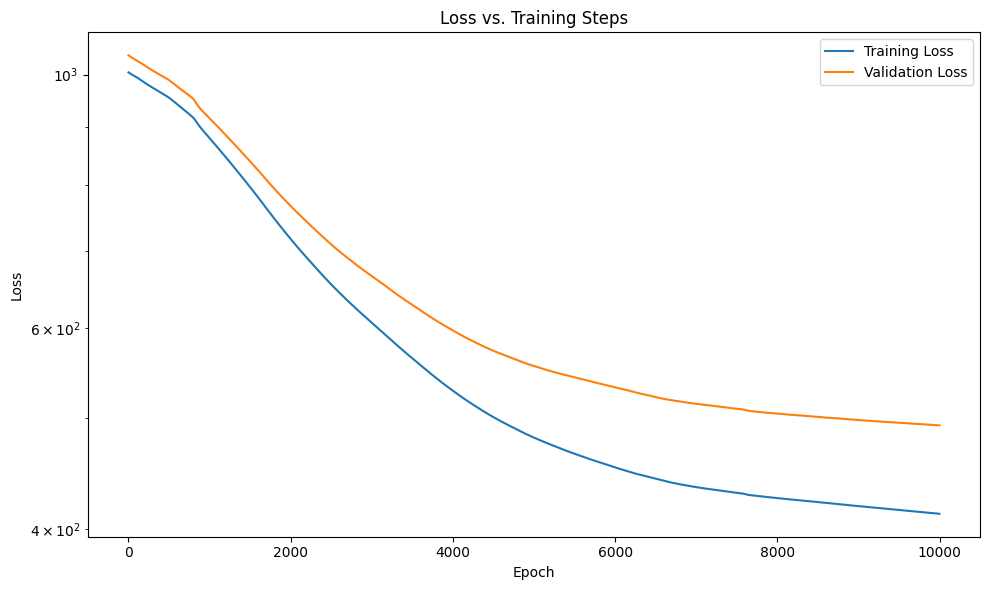

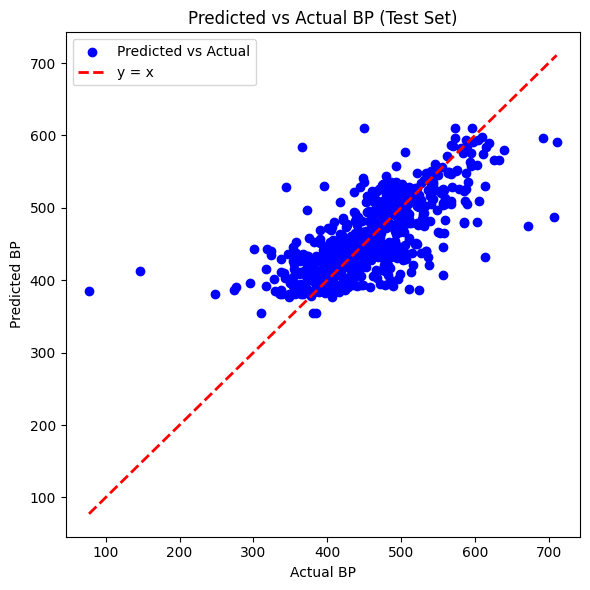

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data for UMAP
##############################################

# Drop non-numeric columns and select features for UMAP
columns_to_drop = ['CAS', 'MW', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Apply UMAP to reduce the data to 10 components
umap_reducer = UMAP(n_components=10, random_state=42)
X_umap = umap_reducer.fit_transform(combined_scaled)

# Filter the target values to match the filtered data
y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)


# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# UMAP of Combined - 10 Components - 64|32 Neuron Hidden Layers

C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Epoch [100/10000], Loss: 1320.9828, Val Loss: 1282.7334, LR: 0.000010
Epoch [200/10000], Loss: 1171.8154, Val Loss: 1154.2388, LR: 0.000010
Epoch [300/10000], Loss: 1089.2858, Val Loss: 1087.2526, LR: 0.000010
Epoch [400/10000], Loss: 1040.0295, Val Loss: 1048.9706, LR: 0.000010
Epoch [500/10000], Loss: 1007.4636, Val Loss: 1023.7838, LR: 0.000010
Epoch [600/10000], Loss: 983.2354, Val Loss: 1004.3743, LR: 0.000010
Epoch [700/10000], Loss: 961.7358, Val Loss: 986.3781, LR: 0.000010
Epoch [800/10000], Loss: 942.0057, Val Loss: 969.3287, LR: 0.000010
Epoch [900/10000], Loss: 923.6970, Val Loss: 953.3697, LR: 0.000010
Epoch [1000/10000], Loss: 906.5549, Val Loss: 938.2923, LR: 0.000010
Epoch [1100/10000], Loss: 890.2079, Val Loss: 923.7526, LR: 0.000010
Epoch [1200/10000], Loss: 874.3652, Val Loss: 909.7102, LR: 0.000010
Epoch [1300/10000], Loss: 858.6559, Val Loss: 895.9818, LR: 0.000010
Epoch [1400/10000], Loss: 838.5403, Val Loss: 877.0319, LR: 0.000010
Epoch [1500/10000], Loss: 821.17

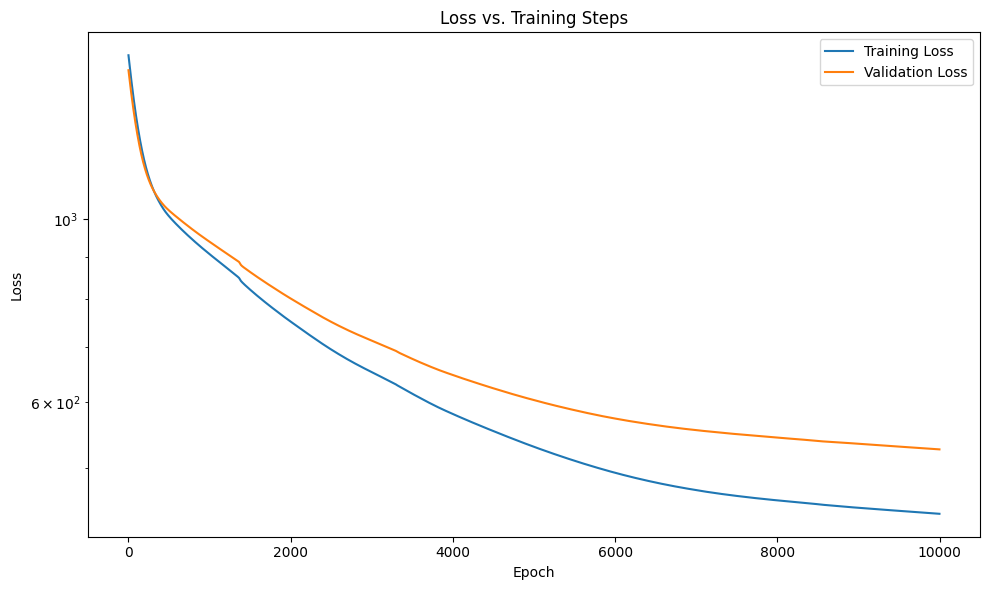

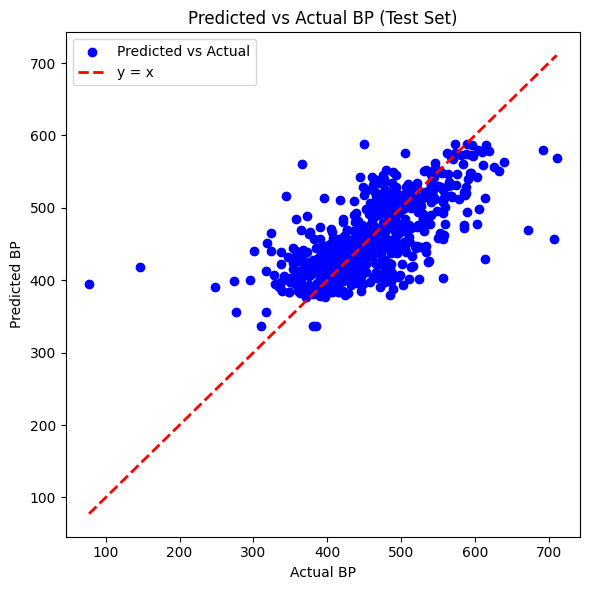

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data for UMAP
##############################################

# Drop non-numeric columns and select features for UMAP
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

# Apply UMAP to reduce the data to 10 components
umap_reducer = umap.UMAP(n_components=10, random_state=42)
X_umap = umap_reducer.fit_transform(combined_scaled)

# Filter the target values to match the filtered data
y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)


# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# Autoencoder of Combined - 10 Latent Dimensions - 64|32|16|32 Neuron Hidden Layers

Epoch [10/100], Loss: 0.7730
Epoch [20/100], Loss: 0.7533
Epoch [30/100], Loss: 0.7438
Epoch [40/100], Loss: 0.7373
Epoch [50/100], Loss: 0.7360
Epoch [60/100], Loss: 0.7371
Epoch [70/100], Loss: 0.7316
Epoch [80/100], Loss: 0.7318
Epoch [90/100], Loss: 0.7303
Epoch [100/100], Loss: 0.7299
Epoch [100/10000], Loss: 1626.3405, Val Loss: 1653.1921, LR: 0.000010
Epoch [200/10000], Loss: 1235.2740, Val Loss: 1267.7883, LR: 0.000010
Epoch [300/10000], Loss: 978.2490, Val Loss: 1015.8347, LR: 0.000010
Epoch [400/10000], Loss: 808.5287, Val Loss: 850.4773, LR: 0.000010
Epoch [500/10000], Loss: 693.9413, Val Loss: 739.5884, LR: 0.000010
Epoch [600/10000], Loss: 616.3947, Val Loss: 666.3441, LR: 0.000010
Epoch [700/10000], Loss: 563.0604, Val Loss: 616.1444, LR: 0.000010
Epoch [800/10000], Loss: 524.3242, Val Loss: 579.2720, LR: 0.000010
Epoch [900/10000], Loss: 494.4371, Val Loss: 549.8996, LR: 0.000010
Epoch [1000/10000], Loss: 470.1967, Val Loss: 524.9909, LR: 0.000010
Epoch [1100/10000], Los

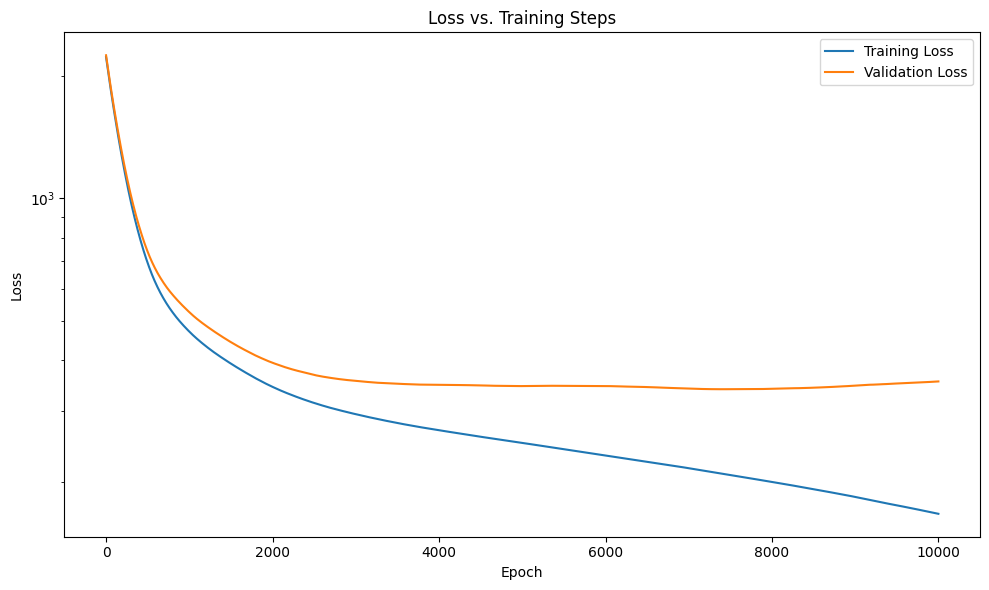

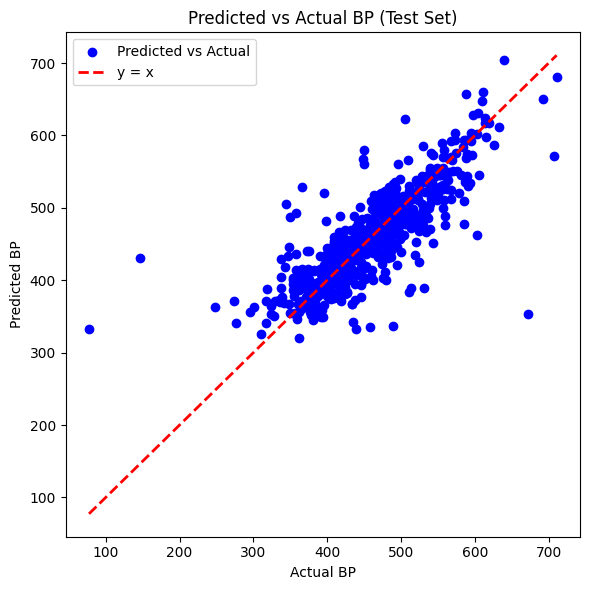

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data
##############################################

# Drop non-numeric columns and select features
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

##############################################
# Autoencoder for Dimensionality Reduction
##############################################

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Convert data to PyTorch tensors
combined_tensor = torch.tensor(combined_scaled, dtype=torch.float32)

# Set up the autoencoder
input_dim = combined_scaled.shape[1]
latent_dim = 10  # Number of components (similar to UMAP's n_components)
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 100
batch_size = 32

# Train the autoencoder
for epoch in range(num_epochs):
    autoencoder.train()
    for i in range(0, len(combined_tensor), batch_size):
        batch = combined_tensor[i:i+batch_size]
        optimizer.zero_grad()
        encoded, decoded = autoencoder(batch)
        loss = criterion(decoded, batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Use the encoder for dimensionality reduction
autoencoder.eval()
with torch.no_grad():
    X_autoencoded, _ = autoencoder(combined_tensor)
X_autoencoded = X_autoencoded.numpy()

##############################################
# Filter the target values to match the filtered data
##############################################

y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()

# Autoencoder of Combined - 10 Latent Dimensions - 64|32 Neuron Hidden Layers

Epoch [10/100], Loss: 0.7861
Epoch [20/100], Loss: 0.7541
Epoch [30/100], Loss: 0.7494
Epoch [40/100], Loss: 0.7450
Epoch [50/100], Loss: 0.7406
Epoch [60/100], Loss: 0.7404
Epoch [70/100], Loss: 0.7393
Epoch [80/100], Loss: 0.7370
Epoch [90/100], Loss: 0.7382
Epoch [100/100], Loss: 0.7363
Epoch [100/10000], Loss: 16629.1836, Val Loss: 16545.0293, LR: 0.000010
Epoch [200/10000], Loss: 10315.9375, Val Loss: 10475.6660, LR: 0.000010
Epoch [300/10000], Loss: 7266.5571, Val Loss: 7567.5708, LR: 0.000010
Epoch [400/10000], Loss: 5649.8872, Val Loss: 6026.5488, LR: 0.000010
Epoch [500/10000], Loss: 4625.0205, Val Loss: 5040.3828, LR: 0.000010
Epoch [600/10000], Loss: 3881.1055, Val Loss: 4310.1167, LR: 0.000010
Epoch [700/10000], Loss: 3307.1274, Val Loss: 3723.4314, LR: 0.000010
Epoch [800/10000], Loss: 2853.2478, Val Loss: 3241.4585, LR: 0.000010
Epoch [900/10000], Loss: 2489.2249, Val Loss: 2841.4697, LR: 0.000010
Epoch [1000/10000], Loss: 2195.5823, Val Loss: 2516.5457, LR: 0.000010
Epoc

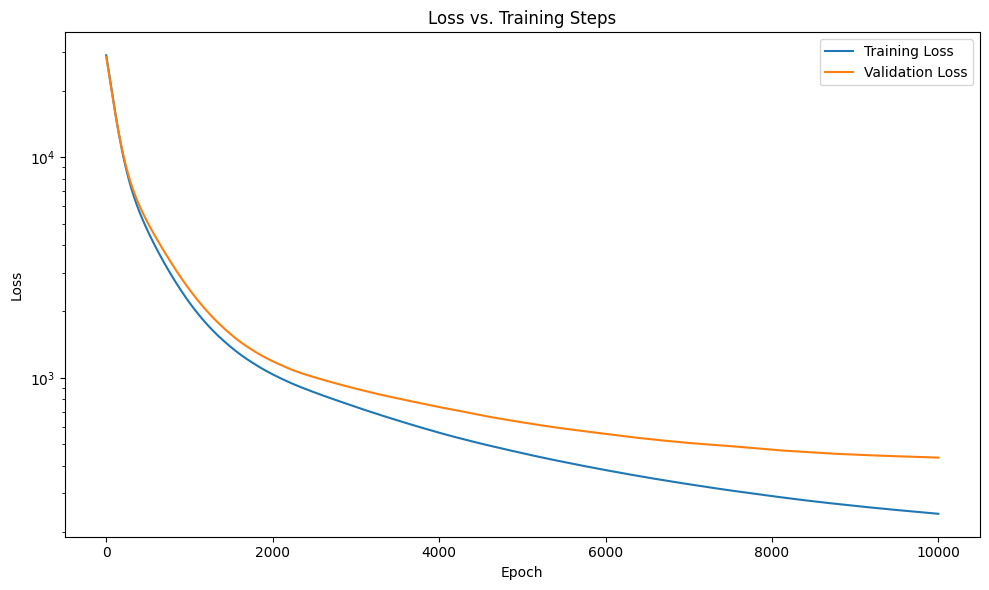

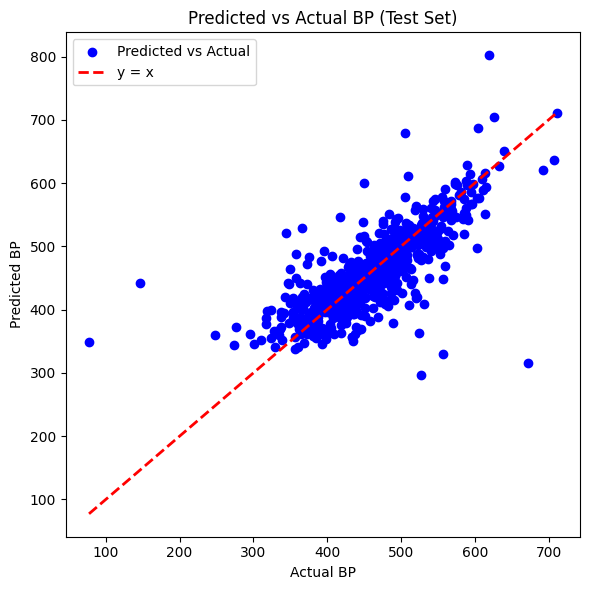

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data
##############################################

# Drop non-numeric columns and select features
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

##############################################
# Autoencoder for Dimensionality Reduction
##############################################

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Convert data to PyTorch tensors
combined_tensor = torch.tensor(combined_scaled, dtype=torch.float32)

# Set up the autoencoder
input_dim = combined_scaled.shape[1]
latent_dim = 10  # Number of components (similar to UMAP's n_components)
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 100
batch_size = 32

# Train the autoencoder
for epoch in range(num_epochs):
    autoencoder.train()
    for i in range(0, len(combined_tensor), batch_size):
        batch = combined_tensor[i:i+batch_size]
        optimizer.zero_grad()
        encoded, decoded = autoencoder(batch)
        loss = criterion(decoded, batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Use the encoder for dimensionality reduction
autoencoder.eval()
with torch.no_grad():
    X_autoencoded, _ = autoencoder(combined_tensor)
X_autoencoded = X_autoencoded.numpy()

##############################################
# Filter the target values to match the filtered data
##############################################

y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()

# Autoencoder of Combined - 50 Latent Dimensions - 64|32 Neuron Hidden Layers

Epoch [10/100], Loss: 0.7978
Epoch [20/100], Loss: 0.7579
Epoch [30/100], Loss: 0.7509
Epoch [40/100], Loss: 0.7517
Epoch [50/100], Loss: 0.7432
Epoch [60/100], Loss: 0.7414
Epoch [70/100], Loss: 0.7366
Epoch [80/100], Loss: 0.7360
Epoch [90/100], Loss: 0.7341
Epoch [100/100], Loss: 0.7355
Epoch [100/10000], Loss: 7330.1265, Val Loss: 6872.6699, LR: 0.000010
Epoch [200/10000], Loss: 5641.9771, Val Loss: 5284.6211, LR: 0.000010
Epoch [300/10000], Loss: 4471.3989, Val Loss: 4183.9214, LR: 0.000010
Epoch [400/10000], Loss: 3630.0164, Val Loss: 3396.3547, LR: 0.000010
Epoch [500/10000], Loss: 3008.1465, Val Loss: 2826.0667, LR: 0.000010
Epoch [600/10000], Loss: 2537.6567, Val Loss: 2400.3569, LR: 0.000010
Epoch [700/10000], Loss: 2172.2913, Val Loss: 2073.3652, LR: 0.000010
Epoch [800/10000], Loss: 1885.1899, Val Loss: 1818.0690, LR: 0.000010
Epoch [900/10000], Loss: 1655.2607, Val Loss: 1614.6265, LR: 0.000010
Epoch [1000/10000], Loss: 1467.3162, Val Loss: 1450.6506, LR: 0.000010
Epoch [1

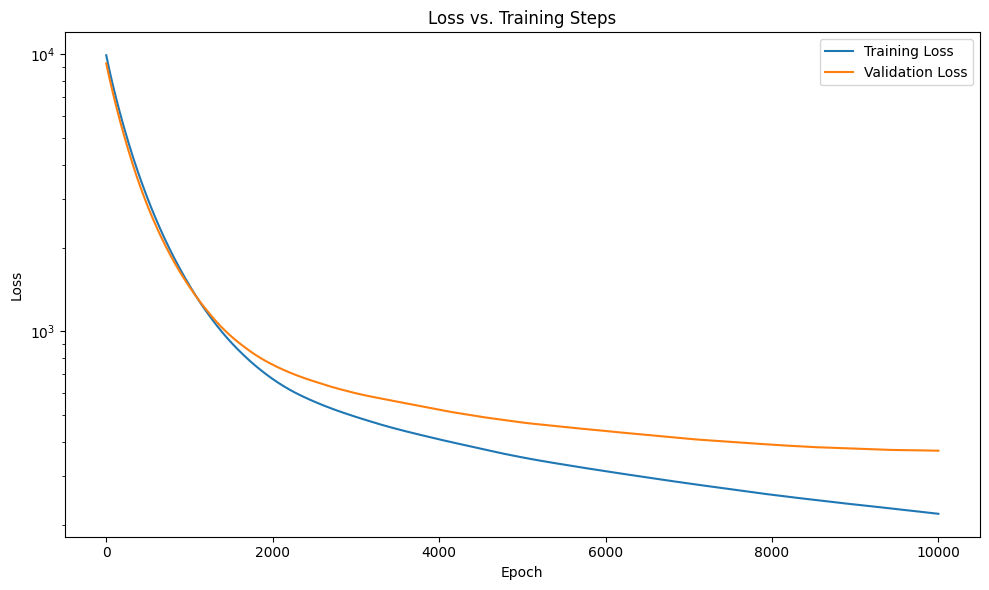

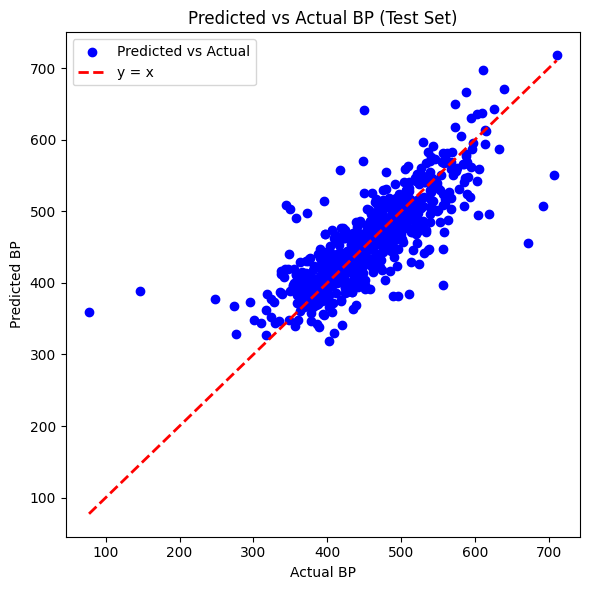

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# Combine selected features with fingerprint data
##############################################

# Drop non-numeric columns and select features
columns_to_drop = ['CAS', 'SMILES', 'mol3D', 'Fingerprint', 'Errors', 'BP']
df_cleaned = df.drop(columns=columns_to_drop).dropna()  # Remove rows with NaN values

# Extract fingerprints
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
fingerprints = fingerprints[df_cleaned.index]

# Combine cleaned features and fingerprints
combined_features = np.hstack((df_cleaned.values, fingerprints))

# Standardize the data (important for dimensionality reduction)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(combined_features)

##############################################
# Autoencoder for Dimensionality Reduction
##############################################

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=50):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Convert data to PyTorch tensors
combined_tensor = torch.tensor(combined_scaled, dtype=torch.float32)

# Set up the autoencoder
input_dim = combined_scaled.shape[1]
latent_dim = 10  # Number of components (similar to UMAP's n_components)
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
num_epochs = 100
batch_size = 32

# Train the autoencoder
for epoch in range(num_epochs):
    autoencoder.train()
    for i in range(0, len(combined_tensor), batch_size):
        batch = combined_tensor[i:i+batch_size]
        optimizer.zero_grad()
        encoded, decoded = autoencoder(batch)
        loss = criterion(decoded, batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Use the encoder for dimensionality reduction
autoencoder.eval()
with torch.no_grad():
    X_autoencoded, _ = autoencoder(combined_tensor)
X_autoencoded = X_autoencoded.numpy()

##############################################
# Filter the target values to match the filtered data
##############################################

y = df.loc[df_cleaned.index, 'BP'].values  # Ensure y is aligned with df_cleaned

##############################################
# Split the data into training and testing sets (80% train, 20% test)
##############################################

X_train, X_test, y_train, y_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

# Scale the target values using StandardScaler
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# Declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 10000')

##############################################
# Training
##############################################

num_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()

# Discussion:
1. **Existing Features to Describe Chemical Structure to Properties**  
   - What have others thought of, and does it work?
2. **Encoding of the Chemical Structure**  
   - Considerations of dataset size vs. problem complexity.
3. **AlphaFold**  
   - Thoughtfully designed a system employing machine learning to solve problems the way a chemist or biologist would approach them.
4. **Use of Large Language Models (LLMs) to find patterns without machine learning**  
   - Not the right way to approach these problems.

# Back to original features - Add Minibatch

Epoch [10/1000], Train Loss: 661.2762, Val Loss: 676.8621, LR: 0.000010
Epoch [20/1000], Train Loss: 383.1901, Val Loss: 407.5963, LR: 0.000010
Epoch [30/1000], Train Loss: 276.3112, Val Loss: 310.7436, LR: 0.000010
Epoch [40/1000], Train Loss: 248.2708, Val Loss: 285.8009, LR: 0.000010
Epoch [50/1000], Train Loss: 236.5597, Val Loss: 274.8998, LR: 0.000010
Epoch [60/1000], Train Loss: 229.8820, Val Loss: 268.6446, LR: 0.000010
Epoch [70/1000], Train Loss: 225.0357, Val Loss: 264.3418, LR: 0.000010
Epoch [80/1000], Train Loss: 221.4529, Val Loss: 261.0737, LR: 0.000010
Epoch [90/1000], Train Loss: 220.5237, Val Loss: 258.2830, LR: 0.000010
Epoch [100/1000], Train Loss: 215.7724, Val Loss: 255.7503, LR: 0.000010
Epoch [110/1000], Train Loss: 216.1223, Val Loss: 253.5411, LR: 0.000010
Epoch [120/1000], Train Loss: 212.1289, Val Loss: 251.4003, LR: 0.000010
Epoch [130/1000], Train Loss: 209.7042, Val Loss: 249.5927, LR: 0.000010
Epoch [140/1000], Train Loss: 207.8177, Val Loss: 247.8720, 

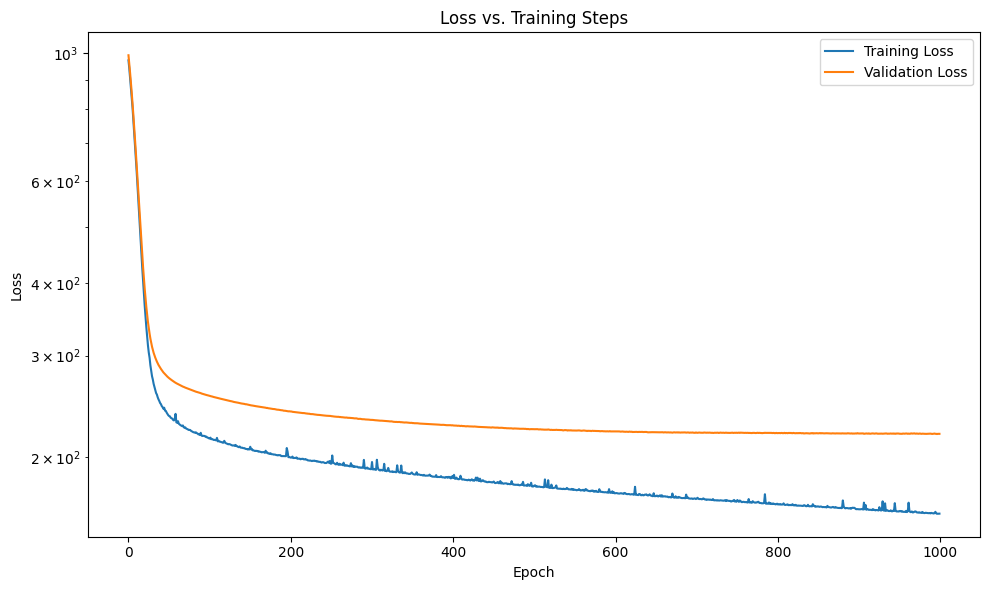

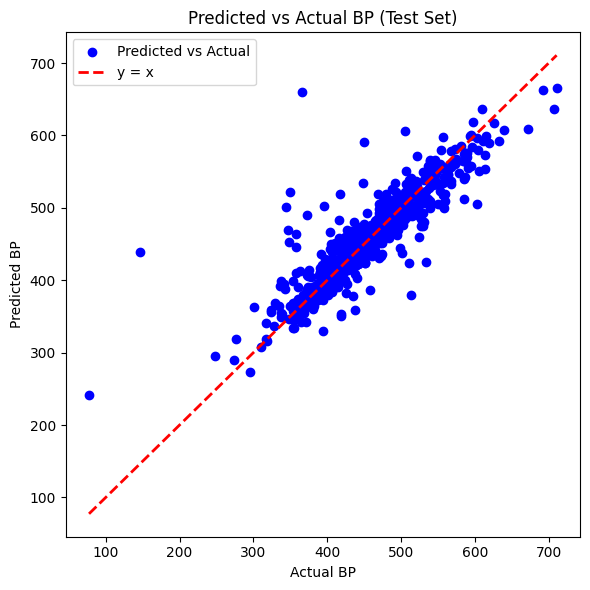

In [19]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os

##############################################
# declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data using specified columns as features
#############################################

# Feature sets
feature_set_1 = ['CripB', 'PartialCharge', 'Vinylic', 'Alcohol', 'CarboxylAcid', 'Ester', 'Allenic', 'Amide']
feature_set_2 = ['MW', 'CripB', 'CripA', 'Arene', 'Ether', 'Vinylic', 'Alcohol', 'Ester', 'Amine', 'Ketone', 'PartialCharge']

# Combine both feature sets into a unique list of features
selected_features = list(set(feature_set_1 + feature_set_2))

# Extract features and target from dataframe
# X = np.array(df[selected_features].tolist(), dtype=np.float32)
X = df[selected_features].values.astype(np.float32)  # Convert to float32 for PyTorch compatibility
y = df['BP'].values  # Target values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Flatten after scaling
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Flatten after scaling

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for minibatch processing
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

##############################################
# create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001  # Track this as a hyperparameter
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
# Log initial hyperparameters
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 5000')

##############################################
# training
##############################################

num_epochs = 1000
train_losses = []
val_losses = []

# Ensure save directory exists
model_save_dir = "./models"
os.makedirs(model_save_dir, exist_ok=True)

for epoch in range(num_epochs):
    net.train()
    epoch_train_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y) * 1000
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', epoch_train_loss, epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 5 == 0:
        torch.save(net.state_dict(), f"{model_save_dir}/model_epoch_{epoch + 1}.pth")

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard without saving to a file
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# Tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
import os
%tensorboard --logdir=runs  --host localhost --port=6067

# No Practice - work on Module Exercise